# Graduate Admission - Linear Regression

# Business Problem:

- To **understand about the factors** which are important in graduate admissions and how these factors are **interrelated** among themselves which will help Educational Institutions **to predict one's chances of admission** given the rest of the variables.

# Column Profiling:

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

# Overview of the notebook:

**EDA**

- Loading and inspecting the Dataset
- Checking Shape of the Dateset , Meaningful Column names
- Validating Duplicate Records, Checking Missing values
- Unique values (counts & names) for each Feature
- Data & Datatype validation

**Univariante & Bivariante Analysis**

- Numerical Variables
- Categorial variables
- Correlation Analysis
- Handling Multicollinearity

**Model Building**

- Handling Categorical variables using dummies
- Test & Train Split
- Rescaling features
- Train Model

**Validate Linear Regression Assumptions**

- Multicolillinearity check
- Mean of residuals
- Linearity of variables
- Test for Homoscedasticity
- Normality of residuals
- Model Performance Evaluation
- Metrics checked - MAE,RMSE,R2,Adj R2
- Train and Test performances are checked
- Comments on performance measures
- Summary of final recommendations

# Exploratory data analysis:

**Importing required packages:**

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from numpy import NaN, nan
from scipy import stats
import statsmodels.api as  sm
import warnings
warnings.filterwarnings("ignore")

# Train & Test data split
from sklearn.model_selection import train_test_split

# Feature scaling
from sklearn.preprocessing import StandardScaler

# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error 

**Loading data into Dataframe:**

In [8]:
grad_adm_data=pd.read_csv('Jamboree_Admission.txt')
grad_adm_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Dropping the unique row Identifier - which is Serial No.

In [9]:
grad_adm_data=grad_adm_data.drop('Serial No.',axis =1)
grad_adm_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Identification of variables and data types:

In [10]:
grad_adm_data.shape

(500, 8)

In [11]:
grad_adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# Analysing the basic metrics:

In [12]:
grad_adm_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [13]:
def missingValue(df):
  #Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending=False)
    percent=((df.isnull().sum()/len(df))*100).sort_values(ascending=False)
    print(f"Total records in our data = {df.shape[0]} where missing values are as follows:")
    missing_data=pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return missing_data

In [14]:
missingValue(grad_adm_data)

Total records in our data = 500 where missing values are as follows:


,Total Missing,In Percent
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
LOR,0,0.0
CGPA,0,0.0
Research,0,0.0
Chance of Admit,0,0.0


# Summary:

- No missing values present in the dataset

In [15]:
numerical_cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
for i in numerical_cols:
    
    print(f" Unique value count in {i} is {grad_adm_data[i].nunique()}")

 Unique value count in GRE Score is 49
 Unique value count in TOEFL Score is 29
 Unique value count in University Rating is 5
 Unique value count in SOP is 9
 Unique value count in LOR  is 9
 Unique value count in CGPA is 184
 Unique value count in Research is 2
 Unique value count in Chance of Admit  is 61


In [16]:
characteristics_catg = ['University Rating', 'SOP', 'LOR ','Research']
for i in characteristics_catg:
    print(f" Unique values in {i} are {grad_adm_data[i].unique()}")

 Unique values in University Rating are [4 3 2 5 1]
 Unique values in SOP are [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
 Unique values in LOR  are [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]
 Unique values in Research are [1 0]


In [17]:
for i in characteristics_catg:
    grad_adm_data[i] = grad_adm_data[i].astype("category")
grad_adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


In [18]:
grad_adm_data.select_dtypes('category').columns

Index(['University Rating', 'SOP', 'LOR ', 'Research'], dtype='object')

In [19]:
list(grad_adm_data.select_dtypes('category').columns)

['University Rating', 'SOP', 'LOR ', 'Research']

In [20]:
print(f"Columns with category datatypes (Categorical Features) are : \
{list(grad_adm_data.select_dtypes('category').columns)}")
print(f"Columns with integer and float datatypes (Numerical Features) are: \
{list(grad_adm_data.select_dtypes(['int64','float64']).columns)}")

Columns with category datatypes (Categorical Features) are : ['University Rating', 'SOP', 'LOR ', 'Research']
Columns with integer and float datatypes (Numerical Features) are: ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']


# Univariate Analysis:

In [21]:
def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig,ax=plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("peachpuff")
    rows=0
    for var in colname:
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var,fontsize=12)
        sns.boxplot(y=df[var],color='crimson',ax=ax[rows][0])
        
        #plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='purple',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(),color='r',linestyle='--',label="Mean")
        ax[rows][1].axvline(df[var].median(),color='m',linestyle='-',label="Median")
        ax[rows][1].axvline(df[var].mode()[0],color='royalblue',linestyle='-',label="Mode")
        ax[rows][1].set_title("Outlier Detection ",fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows+=1
    plt.show()    
        

In [22]:
numerical_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

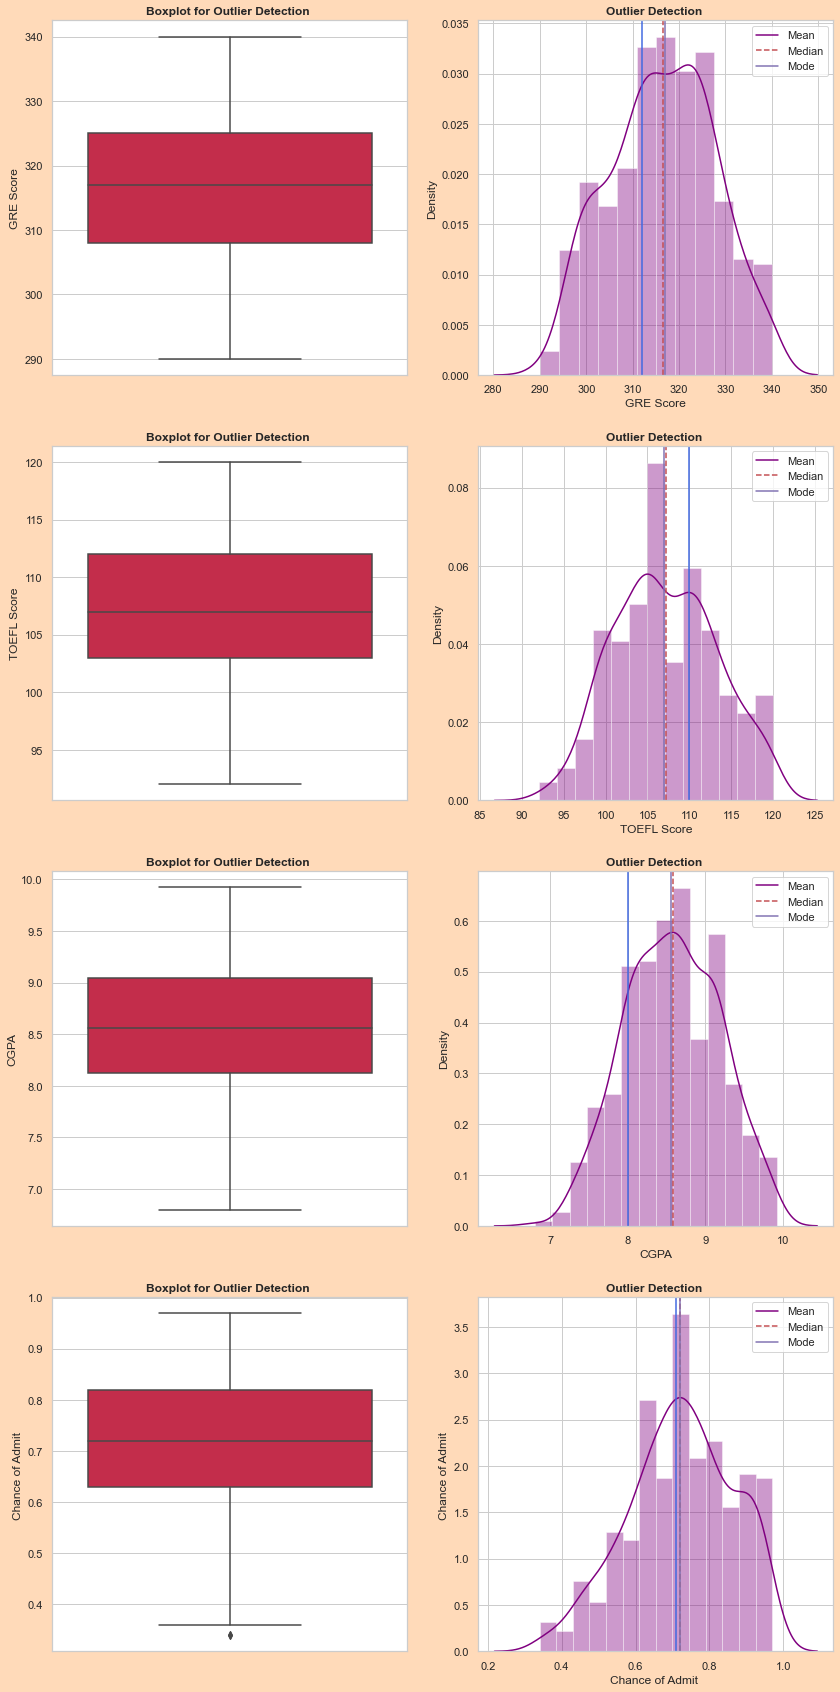

In [23]:
outlier_detect(grad_adm_data,numerical_cols,len(numerical_cols),2,14,30)

- The data for 'GRE Score', 'TOEFL Score', 'CGPA' is normally distibuted with no outliers present.
- The data for 'Chance of Admit ' has a little skewness towards left, with a very negligible no. of outliers

In [24]:
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30,sortbyindex=False):
    fig,ax=plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor(color='peachpuff')
    string="Frequency of "
    rows=0
    for colname in colnames:
        count=(df[colname].value_counts(normalize=True)*100)
        string+=colname + ' in (%)'
        if sortbyindex:
            count = count.sort_index()
        count.plot.bar(color=sns.color_palette("flare"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string,fontsize=14)
        ax[rows][0].set_xlabel(colname,fontsize=14)
        
        count.plot.pie(colors=sns.color_palette("flare"),autopct='%0.0f%%',textprops={'fontsize':14},shadow=True,ax=ax[rows][1])
        #explode=[0.2 if colname{i}==min(colname) else 0]
        ax[rows][0].set_title("Frequency wise " + colname, fontweight="bold")
        string ="Frequency of "
        rows+=1
        

In [25]:
categorical_cols = ['University Rating', 'SOP', 'LOR ', 'Research']

In [26]:
(grad_adm_data['University Rating'].value_counts(normalize=True))

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

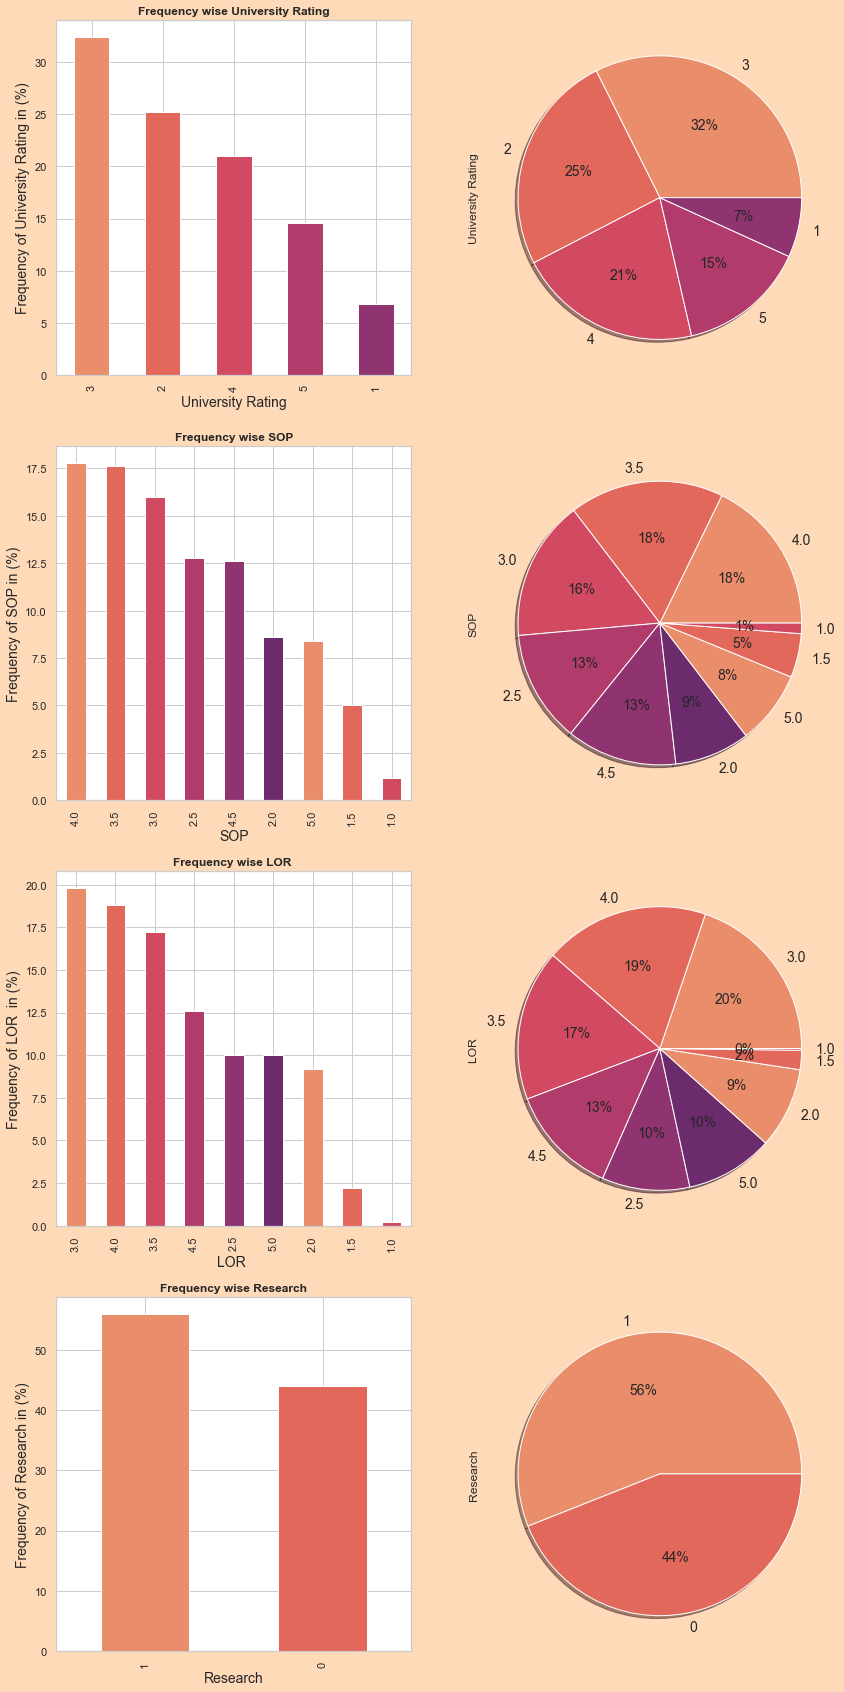

In [27]:
cat_analysis(grad_adm_data,categorical_cols,len(categorical_cols),2,14,30)

# Data Preparation

In [28]:
grad_adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


In [29]:
grad_adm_data['GRE Score'].sort_values().head()

377    290
117    290
168    293
79     294
272    294
Name: GRE Score, dtype: int64

# Backup of orginial dataset

In [30]:
grad_adm_data_new = grad_adm_data.copy()


In [31]:
grad_adm_data_new['GRE Score'].sort_values()

377    290
117    290
168    293
79     294
272    294
      ... 
81     340
84     340
143    340
384    340
429    340
Name: GRE Score, Length: 500, dtype: int64

In [32]:
bins = [290,300,310,320,330,340]
labels =["290-300","300-310","310-320","320-330","330-340"]
grad_adm_data_new['GRE Score bins'] = pd.cut(grad_adm_data_new['GRE Score'], bins, labels=labels)

In [33]:
grad_adm_data_new['TOEFL Score'].sort_values()

368     92
28      93
79      93
411     94
347     94
      ... 
81     120
97     120
297    120
143    120
497    120
Name: TOEFL Score, Length: 500, dtype: int64

In [34]:
bins = [90,100,110,120]
labels =['90-100','100-110','110-120']
grad_adm_data_new['TOEFL Score bins'] = pd.cut(grad_adm_data_new['TOEFL Score'], bins,labels=labels)

In [35]:
grad_adm_data_new['CGPA'].sort_values()

58     6.80
28     7.20
464    7.21
436    7.23
348    7.25
       ... 
425    9.86
203    9.87
496    9.87
202    9.91
143    9.92
Name: CGPA, Length: 500, dtype: float64

In [36]:
bins = [6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0]
labels =['6.5-7.0','7.0-7.5','7.5-8.0','8.0-8.5','8.5-9.0','9.0-9.5','Above 9.5']
grad_adm_data_new['CGPA bins'] = pd.cut(grad_adm_data_new['CGPA'], bins,labels=labels)

In [37]:
grad_adm_data_new

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE Score bins,TOEFL Score bins,CGPA bins
0,337,118,4,4.5,4.5,9.65,1,0.92,330-340,110-120,Above 9.5
1,324,107,4,4.0,4.5,8.87,1,0.76,320-330,100-110,8.5-9.0
2,316,104,3,3.0,3.5,8.00,1,0.72,310-320,100-110,7.5-8.0
3,322,110,3,3.5,2.5,8.67,1,0.80,320-330,100-110,8.5-9.0
4,314,103,2,2.0,3.0,8.21,0,0.65,310-320,100-110,8.0-8.5
...,...,...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,330-340,100-110,9.0-9.5
496,337,117,5,5.0,5.0,9.87,1,0.96,330-340,110-120,Above 9.5
497,330,120,5,4.5,5.0,9.56,1,0.93,320-330,110-120,Above 9.5
498,312,103,4,4.0,5.0,8.43,0,0.73,310-320,100-110,8.0-8.5


In [38]:
grad_adm_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
 8   GRE Score bins     498 non-null    category
 9   TOEFL Score bins   500 non-null    category
 10  CGPA bins          500 non-null    category
dtypes: category(7), float64(2), int64(2)
memory usage: 20.9 KB


In [39]:
#sns.lineplot(x='GRE Score bins',hue='University Rating',data=grad_adm_data_new,palette="rocket")

In [40]:
characteristics_catg = ['University Rating', 'SOP', 'LOR ','Research','GRE Score bins','CGPA bins']

# Bi-Variate Analysis with Research

**Categorical variables**

In [41]:
def cat_bi_analysis(df,colname,depend_var,nrows=2,mcols=2,width=20,height=15):
    fig,ax=plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    fig.set_facecolor("peachpuff")
    rows=0
    string=" based Distribution"
    for var in colname:
        string= var + string 
        sns.countplot(data=df,x=depend_var, hue=var, palette="hls",ax=ax[rows][0])
        sns.countplot(data=df, x=var, hue=depend_var, palette="husl",ax=ax[rows][1])
        ax[rows][0].set_title(string, fontweight="bold",fontsize=14)
        ax[rows][1].set_title(string, fontweight="bold",fontsize=14)
        ax[rows][0].set_ylabel('count', fontweight="bold",fontsize=14)
        ax[rows][0].set_xlabel(var, fontweight="bold",fontsize=14)
        ax[rows][1].set_ylabel('count', fontweight="bold",fontsize=14)
        ax[rows][1].set_xlabel(var, fontweight="bold",fontsize=14)
        rows+=1
        string = " based Distribution"
    plt.show()    
        

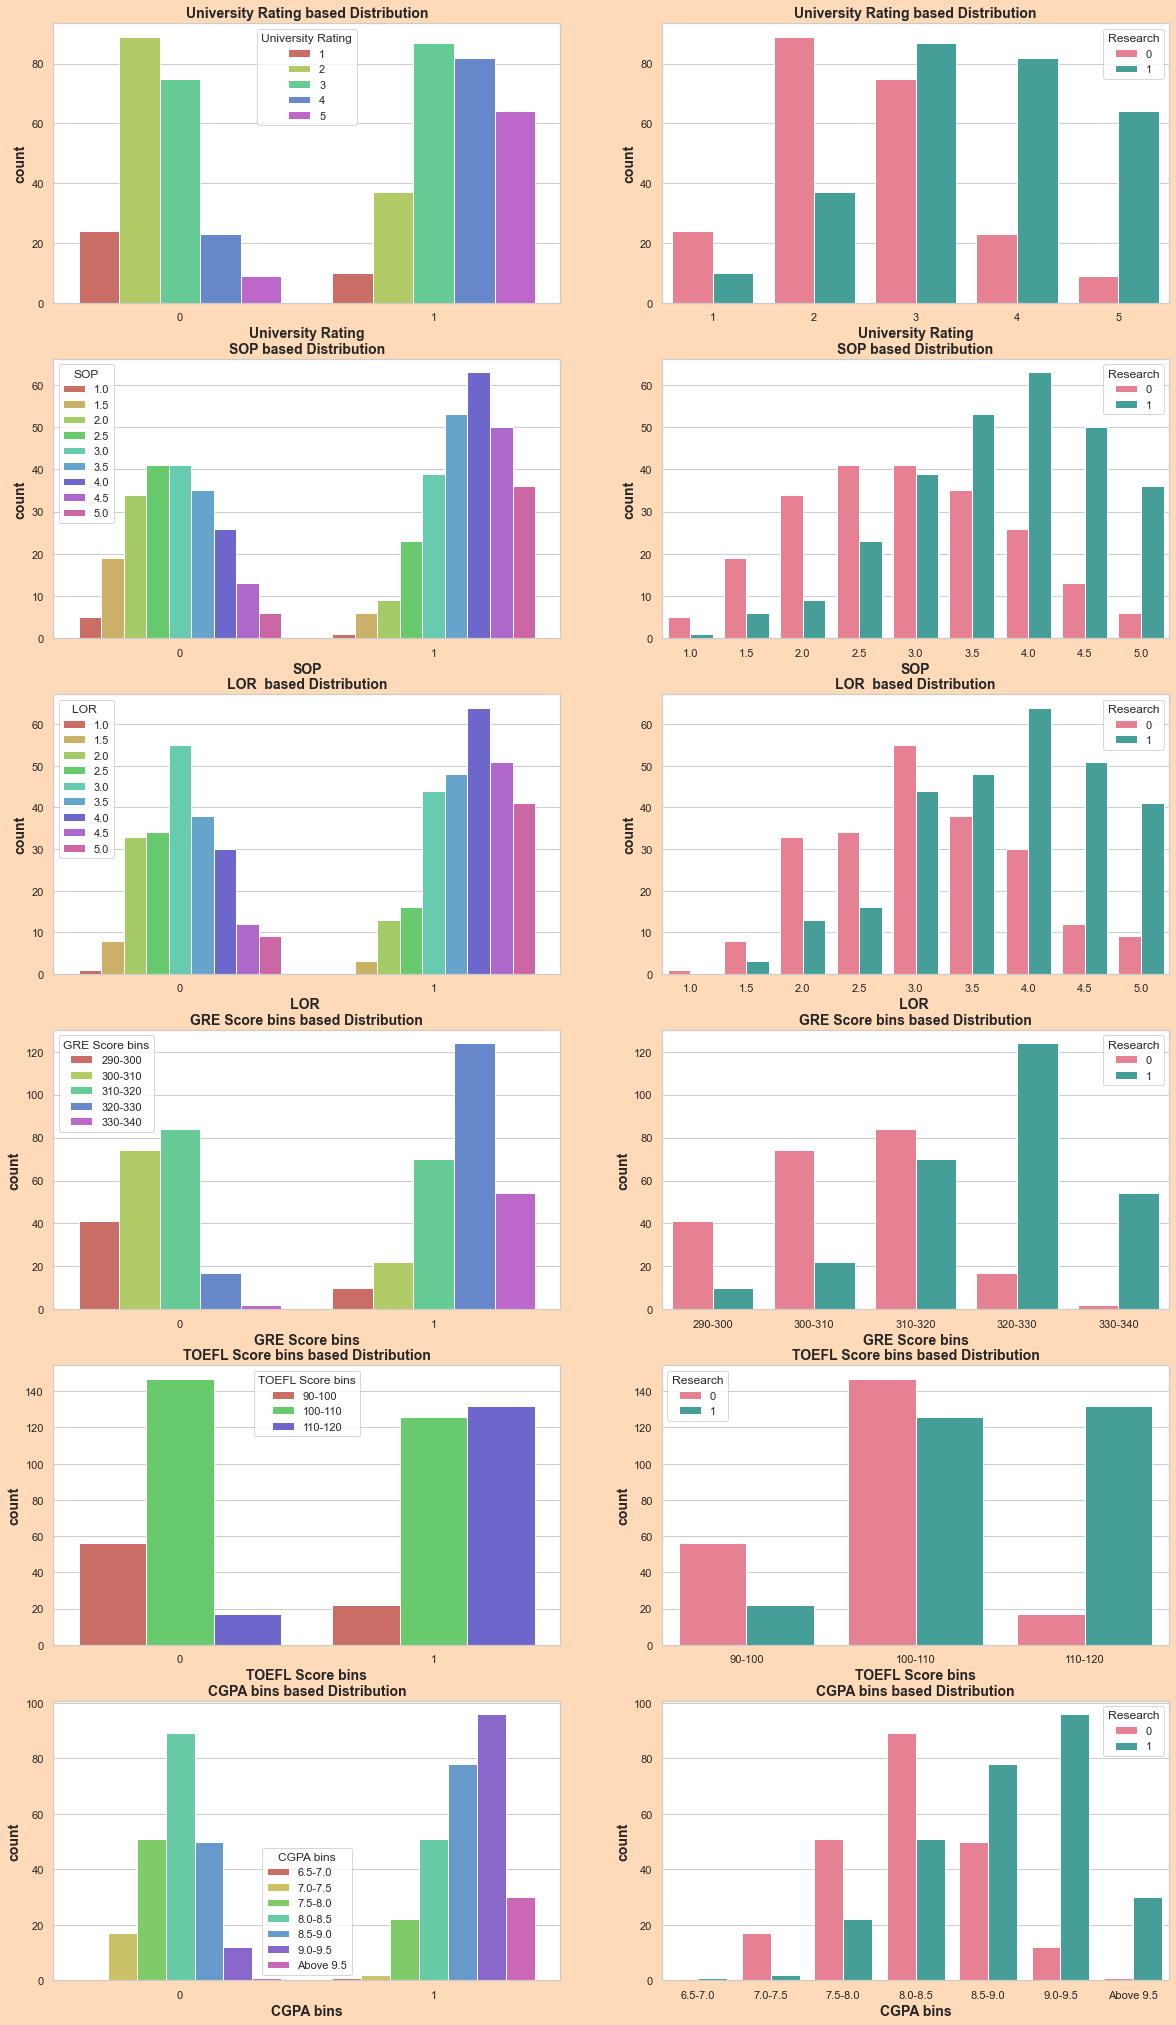

In [42]:
col_names = ['University Rating', 'SOP', 'LOR ','GRE Score bins','TOEFL Score bins','CGPA bins']
cat_bi_analysis(grad_adm_data_new,col_names,'Research',6,2,20,36)

Research criteria is predominantly useful because of following reasons:

- Students to Research papers have more chances of getting into Univeristies with top class ratings (4 & 5).
- Students with higher ratings in LOR and SOP are the students with most number of research paper publications.
- It shouldn't be surprising that the students with higher scores in academics ( GRE, TOEFL and CGPA) are the one's who are actively publishing or had published Research papers in the past.

# Multi-Variant Analysis:

Categorical variables and Numerical variables

In [43]:
def num_bi_analysis(df,colname,category,groupby,nrows=1,mcols=2,width=20,height=8):
    fig,ax=plt.subplots(nrows,mcols,figsize=(width,height),squeeze=False)
    fig.set_facecolor("peachpuff")
    rows=0
    for var in colname:
        sns.boxplot(x=category,y=var,data=df,ax=ax[rows][0])
        sns.lineplot(x=df[category],y=df[var],ax=ax[rows][1],hue=df[groupby])
        ax[rows][0].set_ylabel(var,fontweight="bold",fontsize=14)
        ax[rows][0].set_xlabel(category,fontweight="bold",fontsize=14)
        ax[rows][1].set_ylabel(var,fontweight="bold",fontsize=14)
        ax[rows][1].set_xlabel(category,fontweight="bold",fontsize=14)
    plt.show()    

In [44]:
col_names = ['University Rating', 'SOP', 'LOR ','GRE Score bins','TOEFL Score bins','CGPA bins']

In [45]:
grad_adm_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
 8   GRE Score bins     498 non-null    category
 9   TOEFL Score bins   500 non-null    category
 10  CGPA bins          500 non-null    category
dtypes: category(7), float64(2), int64(2)
memory usage: 20.9 KB


# Column Cleaning

In [46]:
grad_adm_data_new.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'GRE Score bins', 'TOEFL Score bins',
       'CGPA bins'],
      dtype='object')

In [47]:
grad_adm_data['LOR'] = grad_adm_data['LOR ']
grad_adm_data['Chance of Admit'] = grad_adm_data['Chance of Admit ']

grad_adm_data_new['LOR'] = grad_adm_data_new['LOR ']
grad_adm_data_new['Chance of Admit'] = grad_adm_data_new['Chance of Admit ']

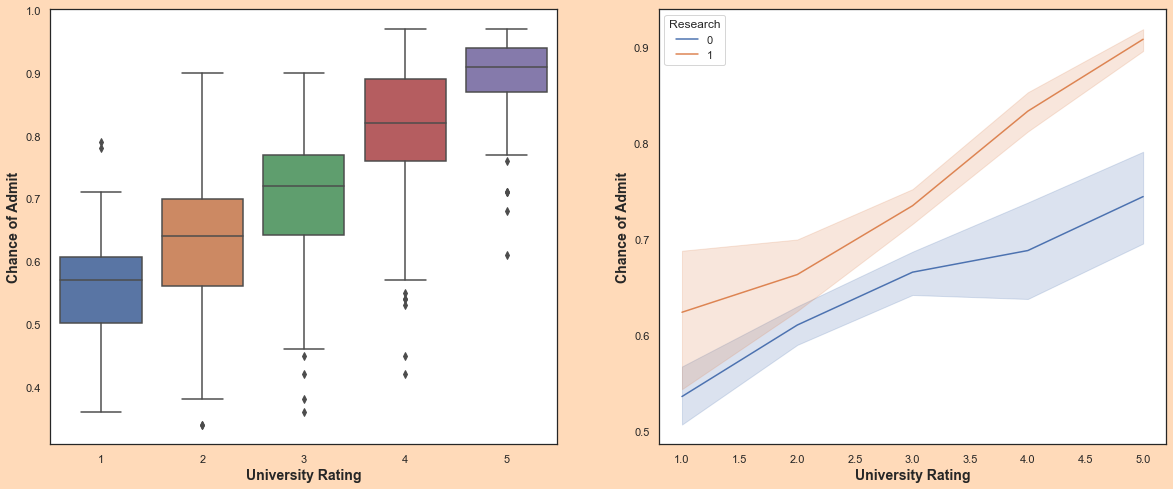

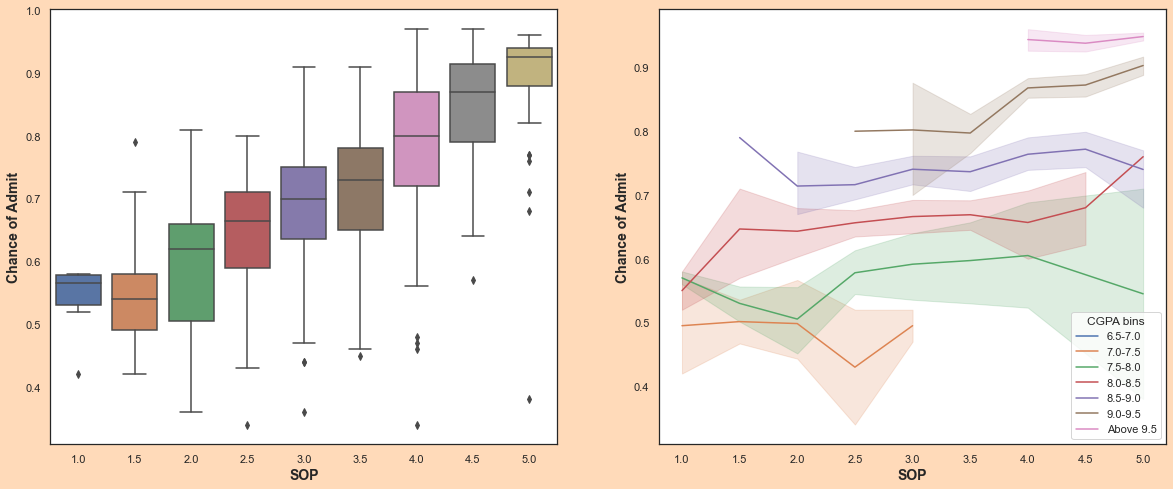

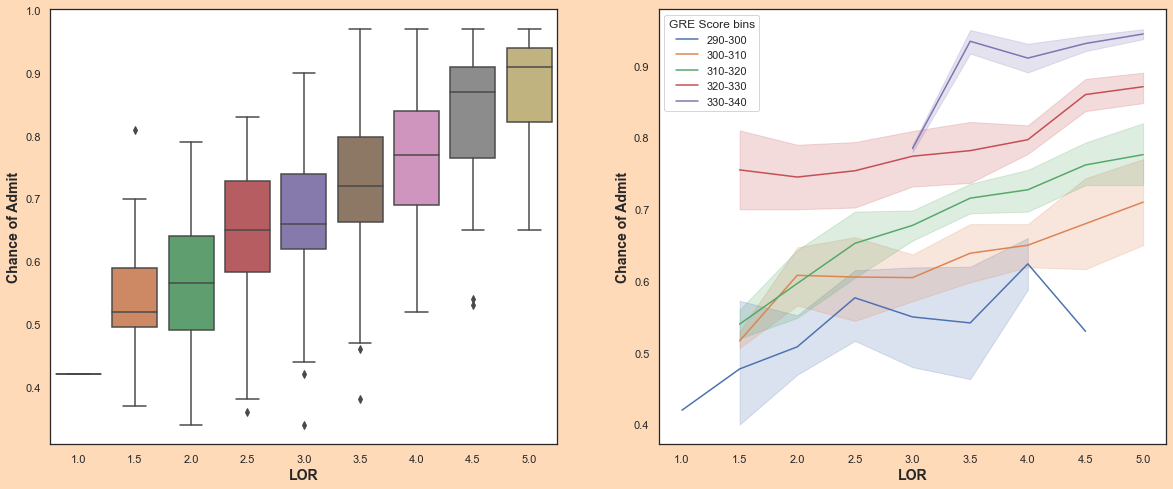

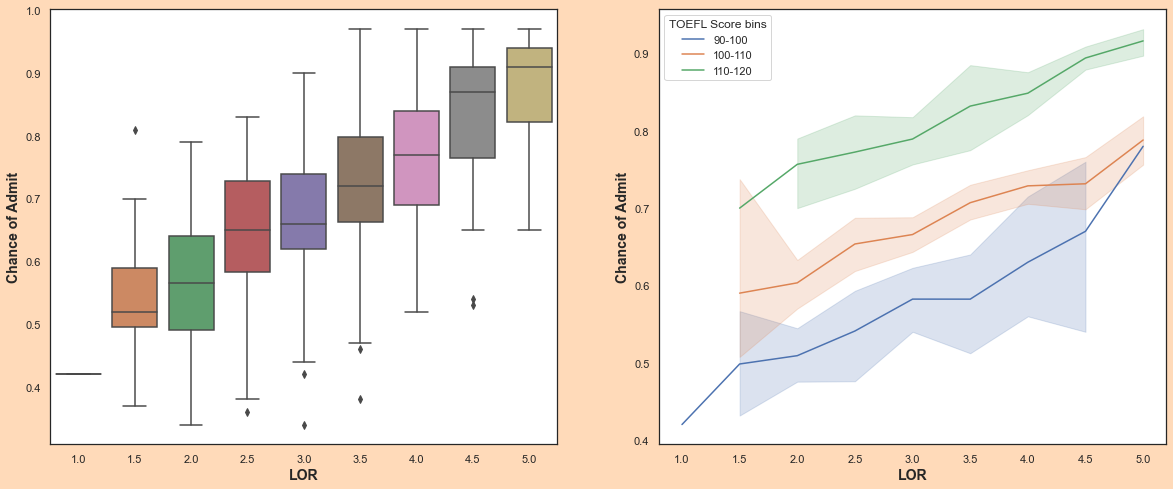

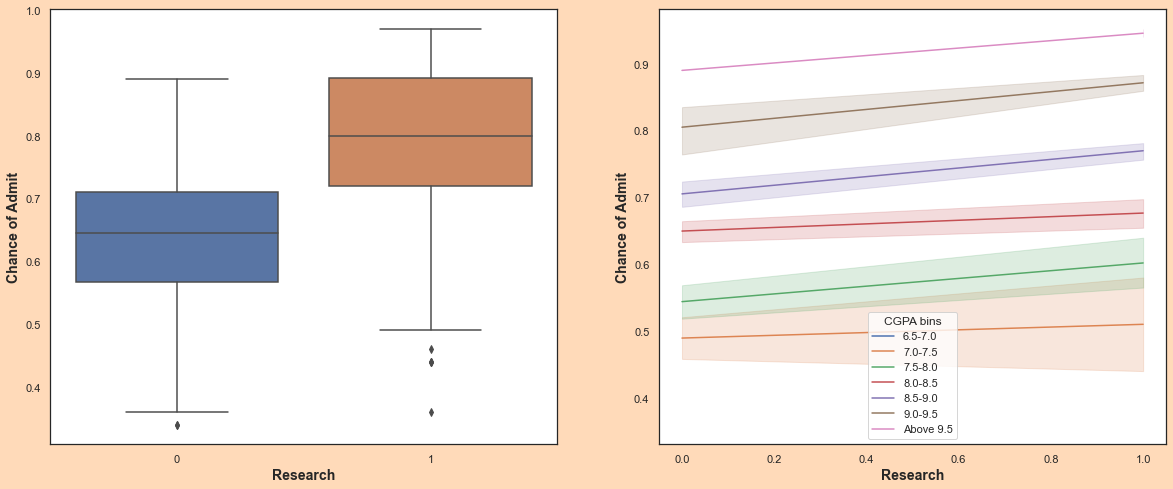

In [48]:
col_num = [ 'Chance of Admit']
num_bi_analysis(grad_adm_data_new,col_num,"University Rating",'Research')

col_num = [ 'Chance of Admit']
num_bi_analysis(grad_adm_data_new,col_num,"SOP",'CGPA bins')

col_num = [ 'Chance of Admit']
num_bi_analysis(grad_adm_data_new,col_num,"LOR",'GRE Score bins')

col_num = [ 'Chance of Admit']
num_bi_analysis(grad_adm_data_new,col_num,"LOR",'TOEFL Score bins')

col_num = [ 'Chance of Admit']
num_bi_analysis(grad_adm_data_new,col_num,'Research',"CGPA bins")

In [49]:
grad_adm_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'LOR', 'Chance of Admit'],
      dtype='object')

In [50]:
grad_adm_data = grad_adm_data.drop('Chance of Admit ', axis = 1)

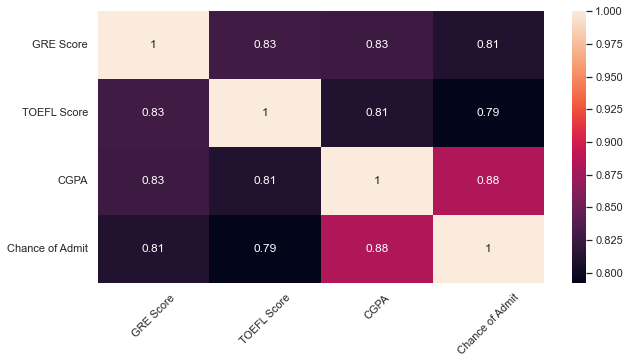

In [51]:
# Correlation between numerical variables

plt.figure(figsize=(10,5))
sns.heatmap(grad_adm_data.corr(method="pearson"),annot=True)
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

- As We can See Chance of Admit is highly Correlated with GRE Score,Toefl Score and CGPA

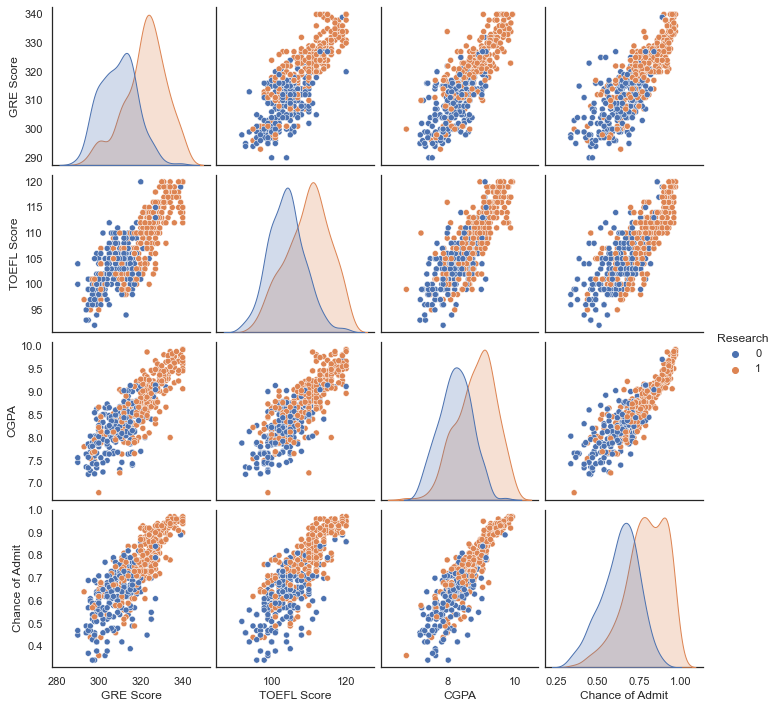

In [52]:
sns.pairplot(grad_adm_data,hue="Research")

In [53]:
grad_adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   LOR                500 non-null    category
 8   Chance of Admit    500 non-null    float64 
dtypes: category(5), float64(2), int64(2)
memory usage: 19.6 KB


In [54]:
categorical_cols_int = ['University Rating','Research']
categorical_cols_float = ['SOP', 'LOR']
for i in categorical_cols_int:
    grad_adm_data[i] = grad_adm_data[i].astype("int64")
for i in categorical_cols_float:
    grad_adm_data[i] = grad_adm_data[i].astype("float64")
grad_adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    int64   
 3   SOP                500 non-null    float64 
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    int64   
 7   LOR                500 non-null    float64 
 8   Chance of Admit    500 non-null    float64 
dtypes: category(1), float64(4), int64(4)
memory usage: 32.2 KB


In [55]:
grad_adm_data = grad_adm_data.drop('LOR ', axis = 1)

In [56]:
grad_adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   CGPA               500 non-null    float64
 5   Research           500 non-null    int64  
 6   LOR                500 non-null    float64
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

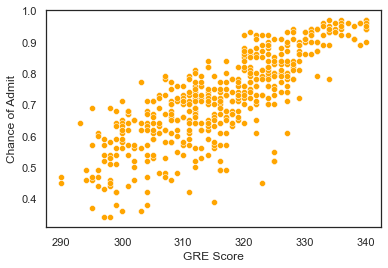

In [57]:
sns.scatterplot(x="GRE Score",y="Chance of Admit",data=grad_adm_data,color='orange')

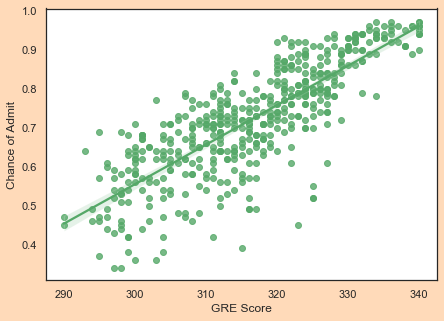

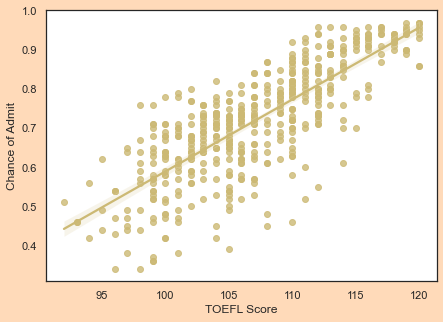

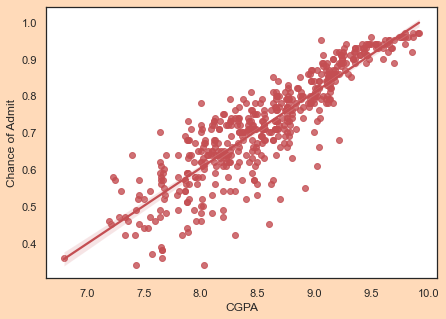

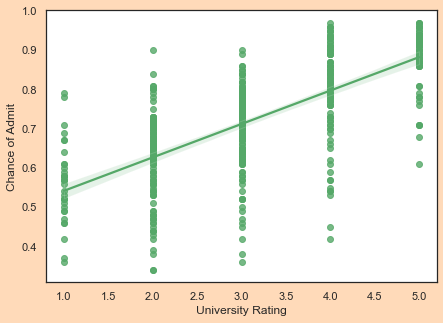

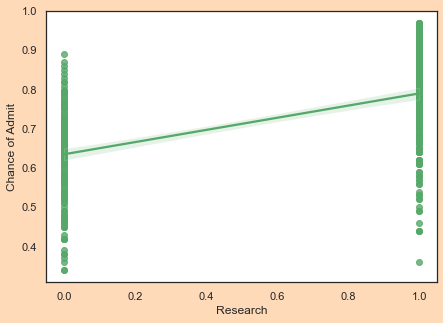

In [58]:
fig=plt.figure(figsize=(7,5))
fig.set_facecolor(color='peachpuff')
sns.regplot(x='GRE Score',y='Chance of Admit',color="g",data=grad_adm_data);

fig=plt.figure(figsize=(7,5))
fig.set_facecolor(color='peachpuff')
sns.regplot(x='TOEFL Score',y='Chance of Admit',color="y",data=grad_adm_data);

fig=plt.figure(figsize=(7,5))
fig.set_facecolor(color='peachpuff')
sns.regplot(x='CGPA',y='Chance of Admit',color="r",data=grad_adm_data);

fig=plt.figure(figsize=(7,5))
fig.set_facecolor(color='peachpuff')
sns.regplot(x='University Rating',y='Chance of Admit',color="g",data=grad_adm_data);

fig=plt.figure(figsize=(7,5))
fig.set_facecolor(color='peachpuff')
sns.regplot(x='Research',y='Chance of Admit',color="g",data=grad_adm_data);

# EDA specific Observations and Inferences :

- By analyzing the distribution of ChanceOfAdmit, we can say that highest percentage of the getting admission at the university is between "0.6" & "1.0"
- By analyzing the distribution of Research, we can say that highest number of the students Research is "1".
- By analyzing the distribution of LOR, we can say that highest number of the Letter of recommendation (LOR) is between "2.5" & "4.5".
- By analyzing the distribution of SOP, we can say that highest number of the Statement of purpose is between "2.5" & "4.5".
- By analyzing the distribution of University Rating, we can say that highest number of the University rating is "2" & "3".
- By analyzing the distribution of TOEFLScore, we can say that highest number of the students TOEFLscore is "110" & "105". Highest TOEFLScore of students is between "99" & "115".
- By analyzing the distribution of GREScore, we can say that highest number of the students GREscore is "312" & "324".Highest GREScore of students is between "304" & "330".
- There is a strong positive relationship between GREScore and Chance Of Admit.
- There is a strong positive relationship between TOEFLScore and Chance Of Admit.
- There is a strong positive relationship between TOEFLScore and Chance Of Admit.

- We cant see any relationship between SOP and Chance Of Admit.

- We cant see any relationship between LOR and Chance Of Admit.
- We can see that the students with Research expericence has higher chance of getting an admit
- There is a strong relationship between UniversityRating and ChanceOfAdmit, but the university with higher rating tends to have a high chance of admit for students


# Building Model with Linear Regression:

**Assumptions made for Simple Linear Regression:**

- **Linearity of residuals:** There needs to be a linear relationship between the dependent variable and independent variable(s).

- **Independence of residuals:** The error terms should not be dependent on one another (like in time-series data wherein the next value is dependent on the previous one). There should be no correlation between the residual terms. The absence of this phenomenon is known as Autocorrelation.There should not be any visible patterns in the error terms.

- **Normal distribution of residuals:** The mean of residuals should follow a normal distribution with a mean equal to zero or close to zero. This is done in order to check whether the selected line is actually the line of best fit or not.If the error terms are non-normally distributed, suggests that there are a few unusual data points that must be studied closely to make a better model.

- **The equal variance of residuals:** The error terms must have constant variance. This phenomenon is known as Homoscedasticity.The presence of non-constant variance in the error terms is referred to as Heteroscedasticity. Generally, non-constant variance arises in the presence of outliers or extreme leverage values.

# Considerations of Multiple Linear Regression:

- All the four assumptions made for Simple Linear Regression still hold true for Multiple Linear Regression along with a few new additional assumptions.

- **Linear Relationship** should be present between input variables and target variables
   - We have already checked this in EDA

- **Multicollinearity:** It is the phenomenon where a model with several independent variables, may have some variables interrelated.
   - **No Multicollinearity** should be present among input variables. As Chance of Admit is highly Correlated with GRE Score,Toefl Score and CGPA, we will cross check which one to check after VIF.

- **Normal Distribution** of target varaibles.
   -  Checked this in EDA.

- **Overfitting:** When more and more variables are added to a model, the model may become far too complex and usually ends up memorizing all the data points in the training set. This phenomenon is known as the overfitting of a model. This usually leads to high training accuracy and very low test accuracy.

- **Feature Selection:** With more variables present, selecting the optimal set of predictors from the pool of given features (many of which might be redundant) becomes an important task for building a relevant and better model.

# Hypothesis in Linear Regression

Once you have fitted a straight line on the data, you need to ask, “Is this straight line a significant fit for the data?” Or “Is the beta coefficient explain the variance in the data plotted?” And here comes the idea of hypothesis testing on the beta coefficient. The Null and Alternate hypotheses in this case are: H0: B1 = 0

HA: B1 ≠ 0

# Assessing the model fit

Some other parameters to assess a model are: t statistic: It is used to determine the p-value and hence, helps in determining whether the coefficient is significant or not F statistic: It is used to assess whether the overall model fit is significant or not. Generally, the higher the value of the F-statistic, the more significant a model turns out to be.

In [59]:
grad_adm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   CGPA               500 non-null    float64
 5   Research           500 non-null    int64  
 6   LOR                500 non-null    float64
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# Model 1

In [60]:
df_1 = grad_adm_data.copy()

In [61]:
df_1.head()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,LOR,Chance of Admit
0,337,118,4,4.5,9.65,1,4.5,0.92
1,324,107,4,4.0,8.87,1,4.5,0.76
2,316,104,3,3.0,8.00,1,3.5,0.72
3,322,110,3,3.5,8.67,1,2.5,0.80
4,314,103,2,2.0,8.21,0,3.0,0.65


In [62]:
df_1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA',
       'Research', 'LOR', 'Chance of Admit'],
      dtype='object')

# Performing Linear Regression

-  Assigning the featurs as X and trarget as Y

In [63]:
Y= df_1["Chance of Admit"]

In [64]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [65]:
X= df_1.drop(["Chance of Admit"],axis =1)

In [66]:
X

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,LOR
0,337,118,4,4.5,9.65,1,4.5
1,324,107,4,4.0,8.87,1,4.5
2,316,104,3,3.0,8.00,1,3.5
3,322,110,3,3.5,8.67,1,2.5
4,314,103,2,2.0,8.21,0,3.0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,9.02,1,4.0
496,337,117,5,5.0,9.87,1,5.0
497,330,120,5,4.5,9.56,1,5.0
498,312,103,4,4.0,8.43,0,5.0


In [141]:
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X, Y,test_size=0.20, random_state=100)

In [143]:
X_train_org.shape, X_test_org.shape, y_train_org.shape, y_test_org.shape

((400, 7), (100, 7), (400,), (100,))

In [144]:
print(X.shape)
print(Y.shape)
X.head()

(500, 7)
(500,)


,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,LOR
0,337,118,4,4.5,9.65,1,4.5
1,324,107,4,4.0,8.87,1,4.5
2,316,104,3,3.0,8.00,1,3.5
3,322,110,3,3.5,8.67,1,2.5
4,314,103,2,2.0,8.21,0,3.0


In [145]:
import statsmodels.api as sm


In [146]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train_org)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train_org, X_train_sm).fit() #statsmodels.regression.linear_model

In [147]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.27e-140
Time:                        20:18:48   Log-Likelihood:                 556.28
No. Observations:                 400   AIC:                            -1097.
Df Residuals:                     392   BIC:                            -1065.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2511      0.119    -10.551      0.000      -1.484      -1.018
GRE Score             0.0015      0.001      2.626      0.009       0.000       0.003
TOEFL Score           0.0031      0.001      3.148      0.002       0.001       0.005
University Rating     0.0050      0.004      1.164      0.245      -0.003       0.013
SOP                  -0.0010      0.005     -0.195      0.845      -0.011       0.009
CGPA                  0.1234      0.011     10.993      0.000       0.101       0.145
Research              0.0268      0.007      3.587      0.000       0.012       0.042
LOR                   0.0193      0.005      4.081      0.000       0.010       0.029
==============================================================================
Omnibus:                       89.475   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.788
Skew:                          -1.139   Prob(JB):                     2.51e-44
Kurtosis:                       5.618   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

- [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
- [2] The condition number is large, 1.3e+04. This might indicate that there are strong multicollinearity or other numerical problems.

In [148]:
# skLearn.Linear_model  -- just another way of getting r2 value

final_model = LinearRegression()
final_model.fit(X_train_org,y_train_org)
final_model.score(X_train_org,y_train_org)

0.8171827660479396

# Performing predictions on the test set

In [149]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test_org)

# Predict the y values corresponding to X_test_sm using stats model mased approach
y_pred = lr.predict(X_test_sm) 

In [150]:
type(lr), type(final_model)

(statsmodels.regression.linear_model.RegressionResultsWrapper,
 sklearn.linear_model._base.LinearRegression)

**Observations:**

- Adding constant to X_test then predicting y_pred using final_model (sklearn) is giving an error as size 7 (orginal) is different from 8 (after adding constant) and hence we will use lr ( stats model) to predict y_pred.
- Also, the reason to use stats model is that we don't have to check the normality of input varaiables.


# Testing the assumptions of the linear regression model:

**1. Multicollinearity check by VIF score :**

In [153]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the new model
def getVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [154]:
getVIF(X_train_sm)

,Features,VIF
0,const,1519.68
5,CGPA,4.81
1,GRE Score,4.77
2,TOEFL Score,3.89
4,SOP,2.77
3,University Rating,2.56
7,LOR,2.02
6,Research,1.50


**Observations from Multicollinearity check:**
 - All features have VIF < 5
 - The problem is we have not considered the some numerical varaiables disguised as categorical varaibles--We will deal with this in next model

**Residuals Analysis**

In [155]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
#R-squared value
print("R2 score of the model is ",r2_score(y_test_org,y_pred))

#MAE value
print("mean_absolute_error  of the model is ",mean_absolute_error(y_test_org,y_pred))

#RMSE value
print( "Root mean squared error of the model is ",np.sqrt( mean_squared_error( y_test_org, y_pred ) ))

#MAPE value
print("Mean absolute percentage error of the model is ", mean_absolute_percentage_error(y_test_org,y_pred))


R2 score of the model is  0.8305208734305358
mean_absolute_error  of the model is  0.04414761591573461
Root mean squared error of the model is  0.057314907809177654
Mean absolute percentage error of the model is  0.06666612045380146


**Final Predictions using orignal test data and calculating residuals**

In [81]:
y_preds = lr.predict(X_test_sm)
errors = y_test_org - y_preds

**2. The mean of residuals is nearly zero**

In [82]:
np.mean(errors)

0.014724738335377853

**3. Linearity of variables**

   - No pattern in the residual plot

Text(0, 0.5, 'y_pred')

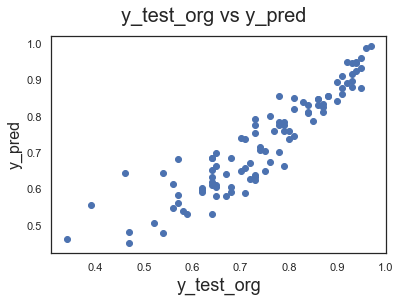

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_org,y_pred)
fig.suptitle('y_test_org vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test_org', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

**4. Test for Homoscedasticity**

eval_env: 1


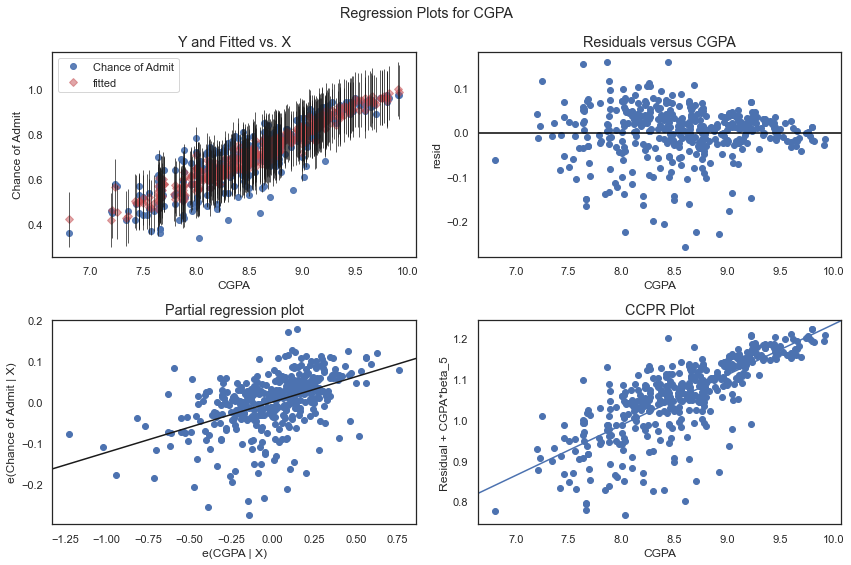

In [84]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lr, 'CGPA', fig=fig)

Text(0.5, 1.0, 'Predicted values vs Residuals')

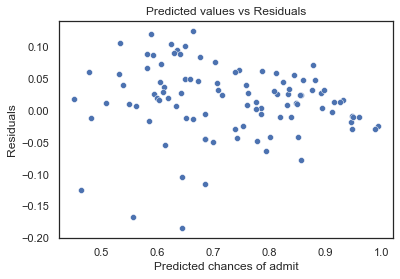

In [85]:
sns.scatterplot(y_preds,errors)
plt.xlabel("Predicted chances of admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

**5. Normality of residuals**

 - Left skewed distribution

<AxesSubplot:ylabel='Count'>

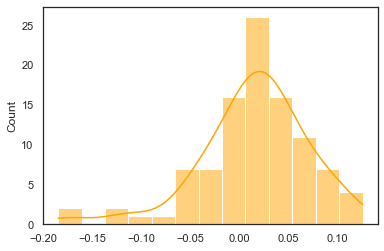

In [86]:
sns.histplot(errors, kde = True, color = 'orange') 

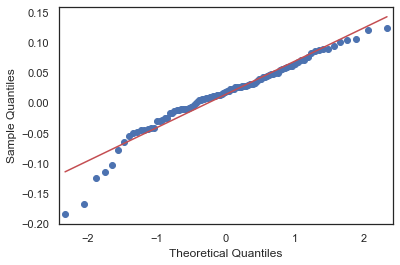

In [87]:
sm.qqplot(errors, line = 's')
plt.show()

# Observations for Model 1:

Here are some key statistics from the summary:

- The coefficient for TOEFL Score is 0.0032, with a very low p-value (0.002). The coefficient is statistically significant. So the association is not purely by chance. Along with TOEFL Score, other scores are GRE Score, Research and CGPA.
- R – squared is 0.83 Meaning that 83.0% of the variance in chance for admit is explained by all the input variables ('GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA','Research', 'LOR'). This is a decent R-squared value but the problem here is we have included all features (both numerical and categorical) which is not good for an ideal model. We will deal with this in further models.
- As we have not normalize the data, we have used stats model based approach to predit chance of admit and to calculate errors.In further models, we will use sklearn based approach where we will normalize the data.
- F-statistics has a very low p-value(2.27e-140 -practically low). Meaning that the model fit is statistically significant, and the explained variance isn’t purely by chance.
- Strong multicollinearity or other numerical problems present.So we will be using VIF to detect and solve this problem.
- **Observations from Multicollinearity check:**
    - All features have VIF < 5
    - The problem is we have not considered the some numerical varaiables disguised as categorical varaibles--We will deal with this in next model

- **Observations from Residual mean check:**
    - The mean of residuals is nearly zero (0.01)

- **Observations from Linearity of variables check:**

    - As there's a clear linear relationship between predicted values and given values for chance of admit, we can say that the variance of both the values is similar

- **Observations from test for Homoscedasticity check:**
    - No pattern in the residual plot

- **Observations from Normality of residuals check:**
    - A little Left skewed distribution.


# Model 2

**Assumptions for Linear Regression:**

All the four assumptions made for Simple Linear Regression still hold true for Multiple Linear Regression along with a few new additional assumptions.

- **Linear Relationship** should be present between input variables and target variables
    - We have already checked this in EDA

- **Multicollinearity:** It is the phenomenon where a model with several independent variables, may have some variables interrelated.
    -**No Multicollinearity** should be present among input variables. As Chance of Admit is highly Correlated with GRE Score,Toefl Score and CGPA, we will cross check which one to check after VIF.

- **Normal Distribution** of target varaibles.
    - Checked this in EDA.

- **Overfitting:** When more and more variables are added to a model, the model may become far too complex and usually ends up memorizing all the data points in the training set. This phenomenon is known as the overfitting of a model. This usually leads to high training accuracy and very low test accuracy.

- **Feature Selection:** With more variables present, selecting the optimal set of predictors from the pool of given features (many of which might be redundant) becomes an important task for building a relevant and better model.

In [88]:
 # One hot encoding to convert categorical features to numerical features.
    
df_2 = pd.get_dummies(grad_adm_data, columns = ['SOP', 'LOR', 'University Rating', 'Research'],drop_first = True)

In [89]:
df_2.columns

Index(['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit', 'SOP_1.5',
       'SOP_2.0', 'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5',
       'SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_2.5', 'LOR_3.0', 'LOR_3.5',
       'LOR_4.0', 'LOR_4.5', 'LOR_5.0', 'University Rating_2',
       'University Rating_3', 'University Rating_4', 'University Rating_5',
       'Research_1'],
      dtype='object')

In [90]:
df_train, df_test = train_test_split(df_2, train_size = 0.8, random_state = 100)

In [91]:
df_train.shape, df_test.shape

((400, 25), (100, 25))

OBS : We have converted all the unique values in categorical columns to one hot encoded values.

**Performing Linear Regression**

# Model Corrections - 2.1

In [92]:
X_train = df_train
y_train = df_train.pop('Chance of Admit')

In [93]:
X_test = df_test
y_test = df_test.pop('Chance of Admit')

In [94]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(400, 24)
(100, 24)
(400,)
(100,)


In [95]:
import statsmodels.api as sm
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit() #statsmodels.regression.linear_model

# Printing the parameters,i.e. intercept and slope of the regression line obtained
lr.params

const                 -1.223134
GRE Score              0.001439
TOEFL Score            0.003206
CGPA                   0.124173
SOP_1.5                0.000809
SOP_2.0                0.006515
SOP_2.5                0.028547
SOP_3.0                0.017773
SOP_3.5                0.011582
SOP_4.0                0.012419
SOP_4.5                0.019126
SOP_5.0                0.014784
LOR_1.5                0.007156
LOR_2.0                0.031433
LOR_2.5                0.055998
LOR_3.0                0.043623
LOR_3.5                0.056081
LOR_4.0                0.067965
LOR_4.5                0.074233
LOR_5.0                0.093998
University Rating_2   -0.018473
University Rating_3   -0.013666
University Rating_4   -0.011481
University Rating_5    0.004601
Research_1             0.027252
dtype: float64

In [96]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     72.26
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          9.47e-125
Time:                        18:30:58   Log-Likelihood:                 561.87
No. Observations:                 400   AIC:                            -1074.
Df Residuals:                     375   BIC:                            -974.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2231    

Performing predictions on the test set

In [97]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

y_pred.head()

69     0.857917
29     0.460663
471    0.620067
344    0.434422
54     0.646538
dtype: float64

Multicollinearity check by VIF score :

In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the new model
def getVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [99]:
getVIF(X_train_sm)

,Features,VIF
0,const,2036.62
15,LOR_3.0,87.66
17,LOR_4.0,82.94
16,LOR_3.5,81.89
18,LOR_4.5,65.67
14,LOR_2.5,50.90
13,LOR_2.0,44.44
19,LOR_5.0,44.29
9,SOP_4.0,25.60
8,SOP_3.5,24.32


# Observations for Model 2.1:

As we can see, this code gives you a brief summary of the linear regression. Here are some key statistics from the summary:

- R – squared is 0.822 Meaning that 82.2% of the variance in chance for admit is explained by all the input variables. This is a decent R-squared value.
- F-statistics has a very low p-value(practically low). Meaning that the model fit is statistically significant, and the explained variance isn’t purely by chance.
- No significant drop in adjusted R squared as compared to previous model.
- Strong multicollinearity exists
- features with p-value > 0.05 and VIF > 5 are :
    - 'SOP_1.5','SOP_2.0', 'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5','SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_2.5', 'LOR_3.0', 'LOR_3.5','LOR_4.0', 'LOR_4.5', 'LOR_5.0','University Rating_3', 'University Rating_4', 'University Rating_5'.
- Multicollinearity has been checked by VIF score and variables are dropped one-by-one till none has VIF>5 for above.

# Model Corrections - 2.2

In [100]:
df_2.columns

Index(['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit', 'SOP_1.5',
       'SOP_2.0', 'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5',
       'SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_2.5', 'LOR_3.0', 'LOR_3.5',
       'LOR_4.0', 'LOR_4.5', 'LOR_5.0', 'University Rating_2',
       'University Rating_3', 'University Rating_4', 'University Rating_5',
       'Research_1'],
      dtype='object')

In [101]:
#Dropping 'GRE Score' as there's a strong corelation between - 'GRE Score', 'TOEFL Score', 'CGPA'.
# Dropping all features with p-value > 0.05 and VIF > 5

In [102]:
X_train1 = X_train[['TOEFL Score', 'CGPA', 'Research_1','University Rating_2']]

In [103]:
import statsmodels.api as sm
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train1)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit() #statsmodels.regression.linear_model

# Printing the parameters,i.e. intercept and slope of the regression line obtained
lr.params

const                 -1.109832
TOEFL Score            0.004614
CGPA                   0.153467
Research_1             0.035551
University Rating_2   -0.009927
dtype: float64

In [104]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     406.7
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.38e-138
Time:                        18:33:41   Log-Likelihood:                 543.02
No. Observations:                 400   AIC:                            -1076.
Df Residuals:                     395   BIC:                            -1056.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1098    

Performing predictions on the test set

In [105]:
X_test.columns

Index(['GRE Score', 'TOEFL Score', 'CGPA', 'SOP_1.5', 'SOP_2.0', 'SOP_2.5',
       'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5', 'SOP_5.0', 'LOR_1.5',
       'LOR_2.0', 'LOR_2.5', 'LOR_3.0', 'LOR_3.5', 'LOR_4.0', 'LOR_4.5',
       'LOR_5.0', 'University Rating_2', 'University Rating_3',
       'University Rating_4', 'University Rating_5', 'Research_1'],
      dtype='object')

In [106]:
X_train1.shape

(400, 4)

In [107]:
 X_test_sm[X_train1.columns]

,TOEFL Score,CGPA,Research_1,University Rating_2
69,115,9.16,1,0
29,99,7.30,0,1
471,103,8.09,0,0
344,96,7.34,0,1
54,110,8.00,0,0
...,...,...,...,...
460,105,8.66,1,0
152,112,9.06,1,0
154,108,8.89,0,0
56,102,7.40,0,0


In [108]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

X_test_new = X_test_sm[X_train_sm.columns]
# Predicting the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_new)

y_pred.head()

69     0.862071
29     0.457322
471    0.606944
344    0.449619
54     0.625429
dtype: float64

**Testing the assumptions of the linear regression model:**

1. **Multicollinearity check by VIF score :**

In [109]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the new model
def getVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [110]:
getVIF(X_train_sm)

,Features,VIF
0,const,413.62
2,CGPA,3.02
1,TOEFL Score,2.96
3,Research_1,1.35
4,University Rating_2,1.19


- **Observations from Multicollinearity check:**
    - All features have VIF < 5
    - The problem is we have not considered the some numerical varaiables disguised as categorical varaibles--We will deal with this in next model

# Residuals Analysis

In [111]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
#R-squared value
print("R2 score of the model is ",r2_score(y_test,y_pred))

#MAE value
print("mean_absolute_error  of the model is ",mean_absolute_error(y_test,y_pred))

#RMSE value
print( "Root mean squared error of the model is ",np.sqrt( mean_squared_error( y_test, y_pred ) ))

#MAPE value
print("Mean absolute percentage error of the model is ", mean_absolute_percentage_error(y_test,y_pred))

R2 score of the model is  0.811517854949051
mean_absolute_error  of the model is  0.046343636819315526
Root mean squared error of the model is  0.06044280316240709
Mean absolute percentage error of the model is  0.06959650556889335


Final Predictions using orignal test data and calculating residuals

In [112]:
y_pred = lr.predict(X_test_new)
errors = y_test - y_pred

2.The mean of residuals is nearly zero

In [113]:
 np.mean(errors)

0.016978208743464795

3.Linearity of variables

Text(0, 0.5, 'y_pred')

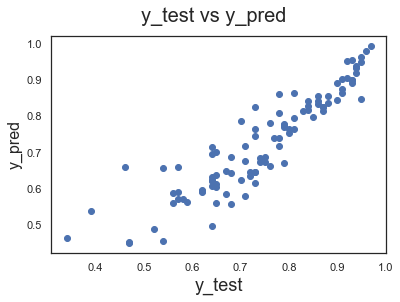

In [114]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

4.Test for Homoscedasticity

eval_env: 1


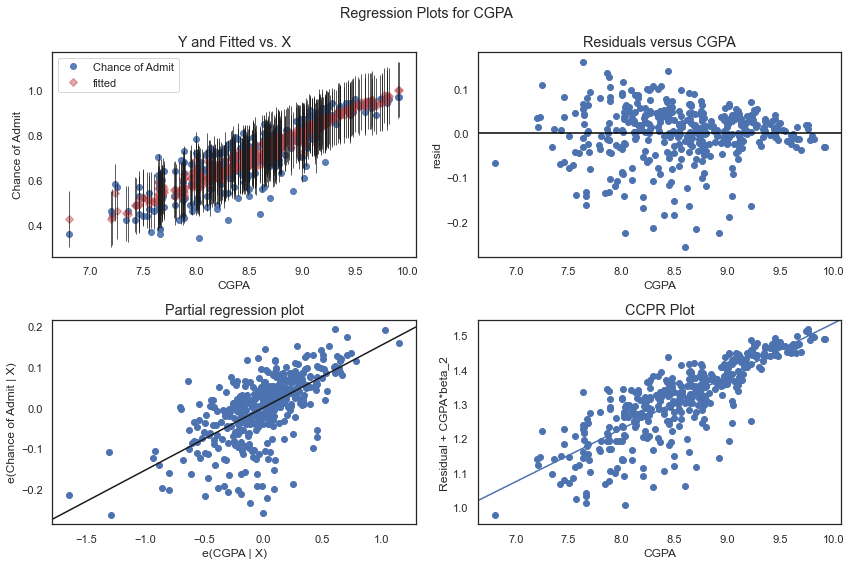

In [116]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lr, 'CGPA', fig=fig)

<AxesSubplot:>

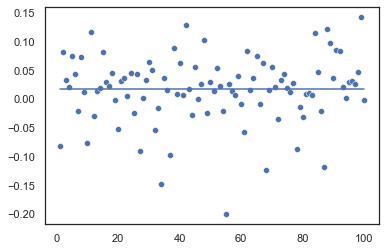

In [117]:
sns.scatterplot(np.arange(1,101,1),errors)
sns.lineplot(np.arange(1,101,1),errors.mean())

Text(0.5, 1.0, 'Predicted values vs Residuals')

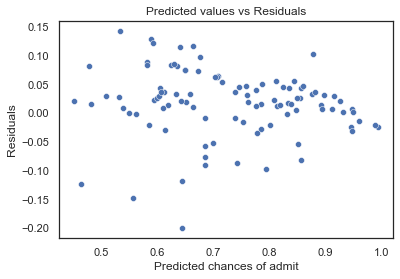

In [118]:
sns.scatterplot(y_preds,errors)
plt.xlabel("Predicted chances of admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

5.Normality of residuals

<AxesSubplot:ylabel='Count'>

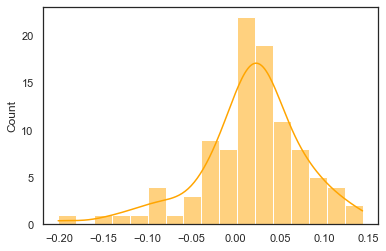

In [119]:
sns.histplot(errors, kde = True, color = 'orange') 

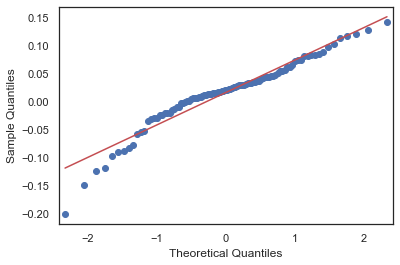

In [120]:
sm.qqplot(errors, line = 's')
plt.show()

The residuals looks normaly distributed

# Observations for Model 2.2:

As we can see, this code gives you a brief summary of the linear regression. Here are some key statistics from the summary:

- R – squared is 0.805 Meaning that 80.5% of the variance in chance for admit is explained by all the input variables. This is a decent R-squared value.
- F-statistics has a very low p-value(practically low). Meaning that the model fit is statistically significant, and the explained variance isn’t purely by chance.
- No significant drop in adjusted R squared as compared to previous model.
- Strong multicollinearity still exists
- No features with p-value > 0.05 and VIF > 5

- **Observations from Multicollinearity check:**
    - All features have VIF < 5

- **Observations from Residual mean check:**
    - The mean of residuals is nearly zero (0.01)

- **Observations from Linearity of variables check:**
    - As there's a clear linear relationship between predicted values and given values for chance of admit, we can say that the variance of both the values is similar

- **Observations from test for Homoscedasticity check:**
    - No pattern in the residual plot

- **Observations from Normality of residuals check:**
    - The residuals looks nearly normally distributed


 # Model Corrections - 2.3

In [121]:
X_train2 = X_train[['CGPA','Research_1']]

In [122]:
import statsmodels.api as sm
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train2)

# Fitting the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit() #statsmodels.regression.linear_model

# Printing the parameters,i.e. intercept and slope of the regression line obtained
lr.params

const        -0.946642
CGPA          0.191245
Research_1    0.043043
dtype: float64

In [123]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     746.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.02e-135
Time:                        18:37:06   Log-Likelihood:                 528.51
No. Observations:                 400   AIC:                            -1051.
Df Residuals:                     397   BIC:                            -1039.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9466      0.051    -18.482      0.0

In [124]:
X_test.columns

Index(['GRE Score', 'TOEFL Score', 'CGPA', 'SOP_1.5', 'SOP_2.0', 'SOP_2.5',
       'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5', 'SOP_5.0', 'LOR_1.5',
       'LOR_2.0', 'LOR_2.5', 'LOR_3.0', 'LOR_3.5', 'LOR_4.0', 'LOR_4.5',
       'LOR_5.0', 'University Rating_2', 'University Rating_3',
       'University Rating_4', 'University Rating_5', 'Research_1'],
      dtype='object')

In [125]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_new1 = X_test_sm[X_train_sm.columns]
# Predicting the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_new1)

y_pred.head()

69     0.848201
29     0.449444
471    0.600527
344    0.457093
54     0.583315
dtype: float64

# Testing the assumptions of the linear regression model (2.3):

1. **Multicollinearity check by VIF score :**

In [126]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the new model
def getVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [127]:
getVIF(X_train_sm)

,Features,VIF
0,const,249.93
1,CGPA,1.28
2,Research_1,1.28


- **Observations from Multicollinearity check:**
    - All features have VIF < 5

# Model performance evaluation and Residuals Analysis

In [128]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
#R-squared value
print("R2 score of the model is ",r2_score(y_test,y_pred))

#MAE value
print("mean_absolute_error  of the model is ",mean_absolute_error(y_test,y_pred))

#RMSE value
print( "Root mean squared error of the model is ",np.sqrt( mean_squared_error( y_test, y_pred ) ))

#MAPE value
print("Mean absolute percentage error of the model is ", mean_absolute_percentage_error(y_test,y_pred))

R2 score of the model is  0.7924005722145115
mean_absolute_error  of the model is  0.050028583149944475
Root mean squared error of the model is  0.06343406832938923
Mean absolute percentage error of the model is  0.0745103804105193


**Final Predictions using orignal test data and calculating residuals**

In [129]:
y_pred=lr.predict(X_test_new1)
errors=y_test-y_pred

**2.The mean of residuals is nearly zero**

In [130]:
np.mean(errors)

0.020401593595412038

**3.Test for Homoscedasticity**

    - No pattern in the residual plot

eval_env: 1


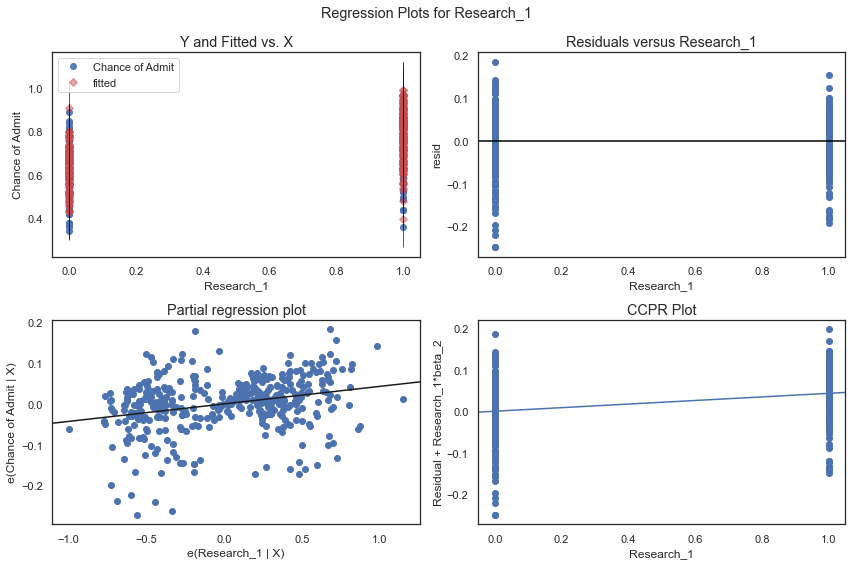

In [131]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(lr,'Research_1',fig=fig)

eval_env: 1


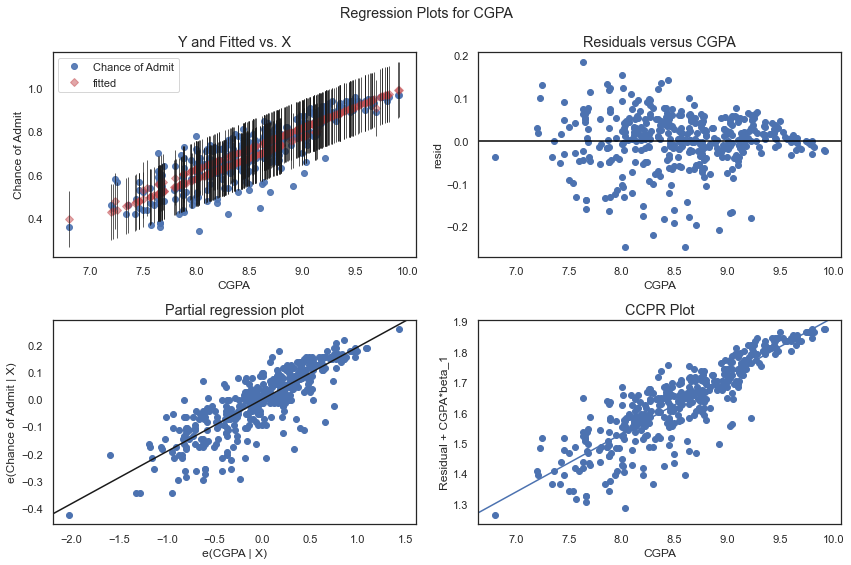

In [132]:
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(lr,'CGPA',fig=fig)

<AxesSubplot:>

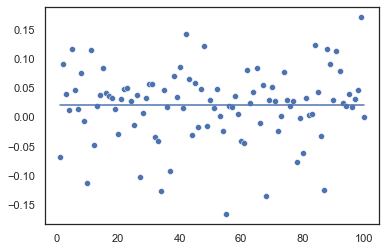

In [134]:
sns.scatterplot(np.arange(1,101,1),errors)
sns.lineplot(np.arange(1,101,1),errors.mean())

Text(0.5, 1.0, 'Predicted values vs Residuals')

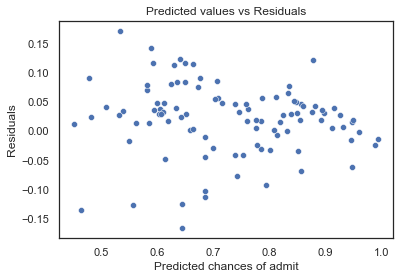

In [135]:
sns.scatterplot(y_preds,errors)
plt.xlabel("Predicted chances of admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

**4.Linearity of variables**

    - As there's a clear linear relationship between predicted values and given values for chance of admit, we can say that the variance of both the values is similar

Text(0, 0.5, 'y_pred')

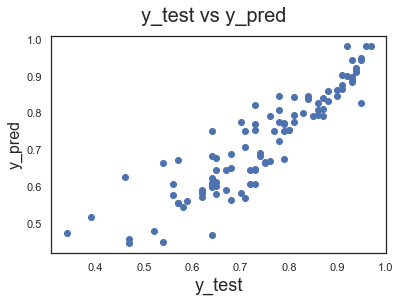

In [136]:
# Plotting y_test and y_pred to understand the spread.
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)    # Plot heading
plt.xlabel('y_test',fontsize=18)                # X - Label
plt.ylabel('y_pred', fontsize=16)

**5.Normality of residuals**

<AxesSubplot:ylabel='Count'>

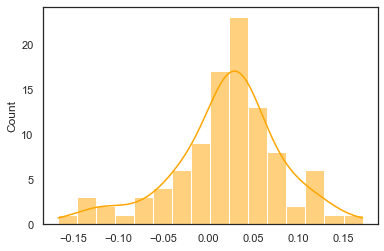

In [137]:
sns.histplot(errors,kde=True,color='orange')

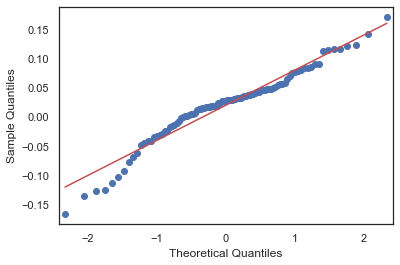

In [138]:
sm.qqplot(errors,line='s')
plt.show()

# Observations for Model 2.3

- If only GRE score is considered out of GRE, TOEFL and CGPA, we are getting less R2 value (0.65)
- If only TOEFL score is considered out of GRE, TOEFL and CGPA, we are getting R2 value (0.666)
- If only CGPA is considered out of GRE, TOEFL and CGPA, we are getting less R2 value (0.791) and ajusted R2 as (0.790), which concludes that **CGPA is the best fit out of the three highly corelated features**
- If we are not including 'University Rating_2' then R2 is not having any drop at all -> 0.790, so we will remove it from our input variable.
- If we are not including 'Research_1' then R2 is dropping to 0.75, so we will keep it as our input variable.
- F-statistics has a very low p-value(practically low). Meaning that the model fit is statistically significant, and the explained variance isn’t purely by chance.
- No significant drop in adjusted R squared as compared to previous model.
- There's hardly any difference between the **R2(0.790) and adjusted R2(0.789)**. Meaning that 79% of the variance in chance for admit is explained by all the input variables (Research and CGPA). This is a decent R-squared value.

**Observations from Multicollinearity check:**
   - All features have VIF < 5

**Observations from Residual mean check:**
   - The mean of residuals is nearly zero (0.02)

**Observations from Linearity of variables check:**
   - As there's a clear linear relationship between predicted values and given values for chance of admit, we can say that the variance of both the values is similar

**Observations from test for Homoscedasticity check:**
   - No pattern in the residual plot

**Observations from Normality of residuals check:**
   - The distribution looks normal


# Actionable Insights & Recommendations:

- Although GRE Score, TOEFL Score, CGPA , University Rating , Research publications , Statement of Purpose and Letter of Recommendation Strength helps in predicting chance of admit, the most important factors in graduate admissions are **CGPA and Research Publications.**
- As there's a strong corelation between GRE Score, TOEFL Score and CGPA, any one of these three can be used to give similar predictions along with the Research criterion.
- The Research criteria is predominantly useful because of following reasons:

    - Students to Research papers have more chances of getting into Univeristies with top class ratings (4 & 5).
    - Students with higher ratings in LOR and SOP are the students with most number of research paper publications.
    - It shouldn't be surprising that the **students with higher scores in academics ( GRE, TOEFL and CGPA) are the one's who are actively publishing** or had published Research papers in the past.
- Everything students do in high school can impact their admissions outcomes.Grades matters a lot.However, during the model building phase I noticed that **LOR (letter of recommendation) also is a strong feature which can be linked with student's behaiviour and extra curricular activities.** There are factors outside student's control that have an impact on their chances as colleges and universities build each freshman class to include a diverse array of students, and that means selecting for diverse racial, economic, and personal backgrounds can be considered for getting a **good LOR ratings which increases the chances of admission** given the rest of the variables. 